#### Heart Disease Prediction Using Decision Trees:
This task concerns heart disease prediction using data from four databases: Cleveland, Hungary, Switzerland, and Long Beach V. The data was collected from 1988 and contained many attributes such as age, sex, and resting blood pressure.

* 1.Write a description of the dataset provided, including, for instance, how many features there are, the number of classes, examples per class in training and testing sets, and so on. (2 marks).

In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignore warnings

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.model_selection import cross_val_score

#### look at training data first

In [16]:
# input data
x_train = pd.read_csv('dataset/x_train.csv')
y_train = pd.read_csv('dataset/y_train.csv')
x_test = pd.read_csv('dataset/x_test.csv')
y_test = pd.read_csv('dataset/y_test.csv')

In [17]:
# look at what the data look like
x_train.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3
1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3
2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7
3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7
4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3


In [18]:
x_train.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,54.410310,0.678577,3.169558,131.340200,249.633492,0.150160,1.019740,149.598946,0.333380,1.051586,1.596153,0.682073,4.714183
std,9.097727,0.467024,0.950532,17.807229,51.790285,0.357229,0.994126,23.090862,0.471422,1.144234,0.629462,0.950810,1.935105
min,27.174373,0.000000,-0.267614,82.918527,101.119555,0.000000,0.000000,63.166763,0.000000,-0.806788,1.000000,0.000000,3.000000
25%,48.060686,0.000000,3.000000,119.945843,216.453899,0.000000,0.000000,135.720082,0.000000,0.000000,1.000000,0.000000,3.000000
50%,55.116959,1.000000,3.000000,129.731240,244.257839,0.000000,2.000000,153.250108,0.000000,0.811204,2.000000,0.000000,3.000000
75%,60.661279,1.000000,4.000000,139.913376,274.357185,0.000000,2.000000,165.182180,1.000000,1.672860,2.000000,1.000000,7.000000
max,79.283485,1.000000,4.000000,209.673650,527.755764,1.000000,2.000000,208.735196,1.000000,6.707044,3.000000,3.000000,7.000000


In [19]:
feature_name = x_train.columns.values

In [20]:
# the proportion between male and female
x_train.groupby('sex').count()

,age,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
sex,,,,,,,,,,,,
0,96427,96427,96427,96427,96427,96427,96427,96427,96427,96427,96427,96427
1,203573,203573,203573,203573,203573,203573,203573,203573,203573,203573,203573,203573


In [21]:
y_train.head()


,class
0,1
1,0
2,1
3,1
4,0


* let's see how many feature do we have?
* how many data items do we have?

In [22]:
x_train.shape

(300000, 13)

* we can see there are 13 feature
* there are 300000 items in the training data.

In [23]:
x_test.shape

(300000, 13)

* also, there are 300000 data in the testing data.

* what is the proportion of fale and female

* look at how many classes in the label?

In [24]:
classes = y_train['class'].drop_duplicates()
classes 

0    1
1    0
Name: class, dtype: int64

In [25]:
y_train.value_counts('class')

class
0    166859
1    133141
dtype: int64

at label, we can see only divide two classes

from here, we know people whose sex=1 is double of sex=0  
I know people sex=1 are more likely to get this disease

------


* 2. Build a decision tree using part of the provided dataset for training and then evaluate your decision tree 
* using part of the provided dataset to measure the decision tree accuracy. Your answer to this item should 
* contain a description of steps you followed to propose your decision tree model, including how to import data, 
* how to train a decision tree, the parameter settings of the algorithm, and so on. Consider using the Python 
* library scikit-learn (https://scikit-learn.org/). 


In [26]:
# instance a tree, 
# random_state:setting random mode parameter, make sure the same result at every single time 
clf = tree.DecisionTreeClassifier(criterion="gini"
                                  ,random_state=30
                                  ,max_depth = 3                            
                                 )
#training data
clf = clf.fit(x_train,y_train)
#return the score of accuracy
score = clf.score(x_test,y_test)
score

0.8415633333333333

In [28]:
# How well does the tree fit the training set?
score_train = clf.score(x_train,y_train)
score_train

0.8396733333333334

In [29]:
[*zip(feature_name,clf.feature_importances_)] #the importance of every feature 

[('age', 0.0),
 ('sex', 0.0),
 ('chest', 0.2831851744927505),
 ('resting_blood_pressure', 0.0),
 ('serum_cholestoral', 0.0),
 ('fasting_blood_sugar', 0.0),
 ('resting_electrocardiographic_results', 0.0),
 ('maximum_heart_rate_achieved', 0.0),
 ('exercise_induced_angina', 0.0),
 ('oldpeak', 0.0),
 ('slope', 0.0),
 ('number_of_major_vessels', 0.2003999868777692),
 ('thal', 0.5164148386294803)]

* 3.Evaluate the decision tree of the previous item, in terms of i) 
* its prediction accuracy; ii) how dependent it is on parameter setting 
* (e.g., maximum number of leaf nodes); iii) any other relevant 
* characteristics. (6 marks).

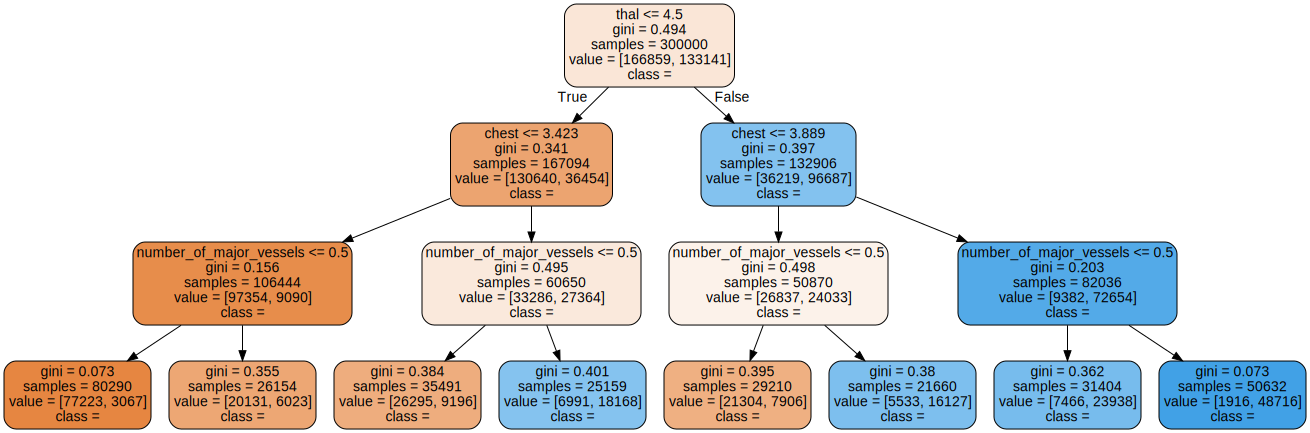

In [30]:
import graphviz

dot_data = tree.export_graphviz(clf
                                ,feature_names = feature_name
                                ,class_names = str(y_train)
                                ,filled = True# filled color
                                ,rounded = True #frame of tree
                                )

graph = graphviz.Source(dot_data)
#graph.render('temp_file','png',view = False)
graph

best score 0.8891199999999999
best depth 10


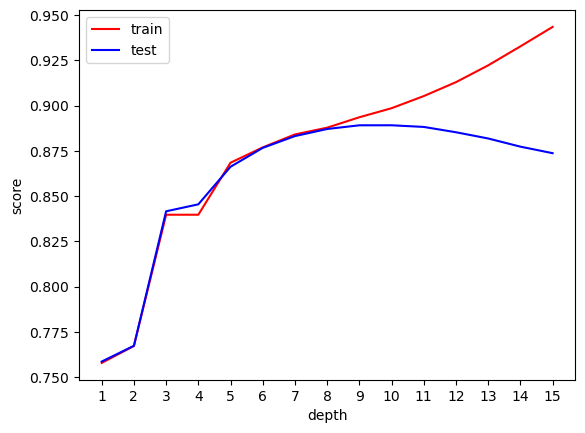

In [32]:
# find the best depth
import matplotlib.pyplot as plt
tr = []
te = []
for i in range(15):
    clf = tree.DecisionTreeClassifier(criterion="gini" #entropy
                                  ,random_state=30
                                  ,max_depth = i+1 
                                 )
    clf = clf.fit(x_train,y_train)
    score_train = clf.score(x_train,y_train)
    score_test = cross_val_score(clf,x_test,y_test,cv=10).mean()
    tr.append(score_train)
    te.append(score_test)
print('best score',max(te))
print('best depth',te.index(max(te))+1)
plt.plot(range(1,16),tr,color='red',label='train')
plt.plot(range(1,16),te,color='blue',label='test')
plt.xticks(range(1,16))
plt.legend()
plt.xlabel('depth')
plt.ylabel('score')
plt.show()

    
    

#### Grid search 
when there  are a lot parameters, drawing learning cruve is boring
Using this method can adjust more than one parameter but it is time consuming

---
first adjust min_samples_leaf and criterion

In [58]:
#parameters a seires of parameters which correspond a range of numbers
parameters = {"criterion":("gini","entropy")
              ,"min_samples_leaf":[*range(1,50,5)] #search in 1-50, step is 5  setting the least leaf node 
            }
clf = tree.DecisionTreeClassifier(random_state=25
                                  ,max_depth=10
                                 )

GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(x_train, y_train)

print(GS.best_params_) #return the best combination
print(GS.best_score_) #best score


{'criterion': 'entropy', 'min_samples_leaf': 41}
0.8906599999999999


then adjust min_samples_split and min_impurity_decrease

In [60]:
#parameters a seires of parameters which correspond a range of numbers
parameters = {"min_samples_split":[*range(1,50,5)]
              ,"min_impurity_decrease":[*np.linspace(0,0.5,50)]#minimun IG
             }
clf = tree.DecisionTreeClassifier(random_state=25
                                  ,max_depth=10
                                  ,criterion="entropy"
                                 ,min_samples_leaf=41
                                 )

GS = GridSearchCV(clf, parameters, cv=10) #parameters: the list of parameters and the range of parameters
GS = GS.fit(x_train, y_train)

print(GS.best_params_) #best combination
print(GS.best_score_) #best scoreCv


{'min_impurity_decrease': 0.0, 'min_samples_split': 6}
0.8906599999999999


In [ ]:
# this model is the best one.

In [76]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=25
                                 , splitter="best"
                                  ,max_depth = 10 # 10 layers
                                  ,min_samples_leaf = 41 
                                 ,min_samples_split = 6 
                               
                                 )
#training data
clf = clf.fit(x_train,y_train)

score = clf.score(x_test,y_test)
score

0.89089

In [77]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=25
                                 , splitter="random"
                                  ,max_depth = 10 # 10 layers
                                  ,min_samples_leaf = 41 
                                 ,min_samples_split = 6 
                               
                                 )
#training data
clf = clf.fit(x_train,y_train)
clf = clf.fit(x_train,y_train)

score = clf.score(x_test,y_test)
score

0.8809533333333334